<a href="https://colab.research.google.com/github/Geuens/curso_ai/blob/main/Copy_of_Ejercicio1_pandas_dataframes_pesos_alturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Práctico con Pandas

## Objetivo: Explorar y analizar el conjunto de datos de pesos y alturas.

### Parte 1: Exploración Básica del DataFrame

    Cargar el archivo CSV en un DataFrame de Pandas.
    Explorar el DataFrame:
        Mostrar las primeras y últimas 5 filas del DataFrame.
        Obtener información general del DataFrame, como el número de filas, columnas y tipos de datos.
        Calcular estadísticas descriptivas básicas para las columnas numéricas (media, mediana, desviación estándar, mínimos y máximos).

### Parte 2: Limpieza y Preparación de Datos

    Convertir la altura de pulgadas a centímetros.
    Convertir el peso de libras a kilogramos.
    Tratar con valores faltantes (si los hay): Identificar y manejar los valores faltantes en el conjunto de datos.

#### Parte 3: Análisis Exploratorio de Datos

    Agrupar datos por género y calcular el peso medio para cada género.
    Visualización:
        Crear histogramas de las distribuciones de altura y peso.
        Crear un diagrama de caja (boxplot) para comparar la distribución del peso entre géneros.
    Filtrar datos para un rango de altura específico y calcular estadísticas descriptivas.

### Parte 4: Operaciones Avanzadas

    Calcular los percentiles del peso para cada género.
    Crear una nueva columna que clasifique a los individuos como 'Bajo Peso', 'Peso Normal', 'Sobrepeso' o 'Obesidad' basado en su IMC (Índice de Masa Corporal).

### Parte 5: Exportar Resultados

    Guardar los resultados del análisis en un nuevo archivo CSV.

### Parte 1: Exploración Básica del DataFrame

    Cargar el archivo CSV en un DataFrame de Pandas.
    Explorar el DataFrame:
        Mostrar las primeras y últimas 5 filas del DataFrame.
        Obtener información general del DataFrame, como el número de filas, columnas y tipos de datos.
        Calcular estadísticas descriptivas básicas para las columnas numéricas (media, mediana, desviación estándar, mínimos y máximos).

In [14]:
import pandas as pd
URL = "https://drive.google.com/uc?export=download&id=1-zKKm5aEEabJS01n4vZhE8iiacnXYWGg"
df = pd.read_csv(URL)

In [15]:
print(df.head(5).to_string(index=False))

Gender    Height     Weight
  Male 73.847017 241.893563
  Male 68.781904 162.310473
  Male 74.110105 212.740856
  Male 71.730978 220.042470
  Male 69.881796 206.349801


In [16]:
print(df.tail(5).to_string(index=False))

Gender    Height     Weight
Female 66.172652 136.777454
Female 67.067155 170.867906
Female 63.867992 128.475319
Female 69.034243 163.852461
Female 61.944246 113.649103


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  9998 non-null   float64
 2   Weight  9998 non-null   float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [18]:
df.describe()

,Height,Weight
count,9998.000000,9998.000000
mean,66.366788,161.434302
std,3.847510,32.108770
min,54.263133,64.700127
25%,63.505073,135.815966
50%,66.317827,161.197662
75%,69.170292,187.139777
max,78.998742,269.989699



### Parte 2: Limpieza y Preparación de Datos

    Convertir la altura de pulgadas a centímetros.
    Convertir el peso de libras a kilogramos.
    Tratar con valores faltantes (si los hay): Identificar y manejar los valores faltantes en el conjunto de datos.

In [19]:
# Convertir la altura de pulgadas a centímetros (1 pulgada = 2.54 cm)
df['Height'] = df['Height'] * 2.54

# Convertir el peso de libras a kilogramos (1 libra = 0.453592 kg)
df['Weight'] = df['Weight'] * 0.453592

In [20]:
df.head(5)

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499761,93.598619


In [21]:
df.isnull().sum()

Gender    0
Height    2
Weight    2
dtype: int64

In [22]:
data_clean = df.dropna()

In [23]:
data_clean.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

#### Parte 3: Análisis Exploratorio de Datos

    Agrupar datos por género y calcular el peso medio para cada género.
    Visualización:
        Crear histogramas de las distribuciones de altura y peso.
        Crear un diagrama de caja (boxplot) para comparar la distribución del peso entre géneros.
    Filtrar datos para un rango de altura específico y calcular estadísticas descriptivas.

In [24]:
peso_medio_genero = data_clean.groupby('Gender')['Weight'].mean()
peso_medio_genero

Gender
Female    61.625051
Male      84.827280
Name: Weight, dtype: float64

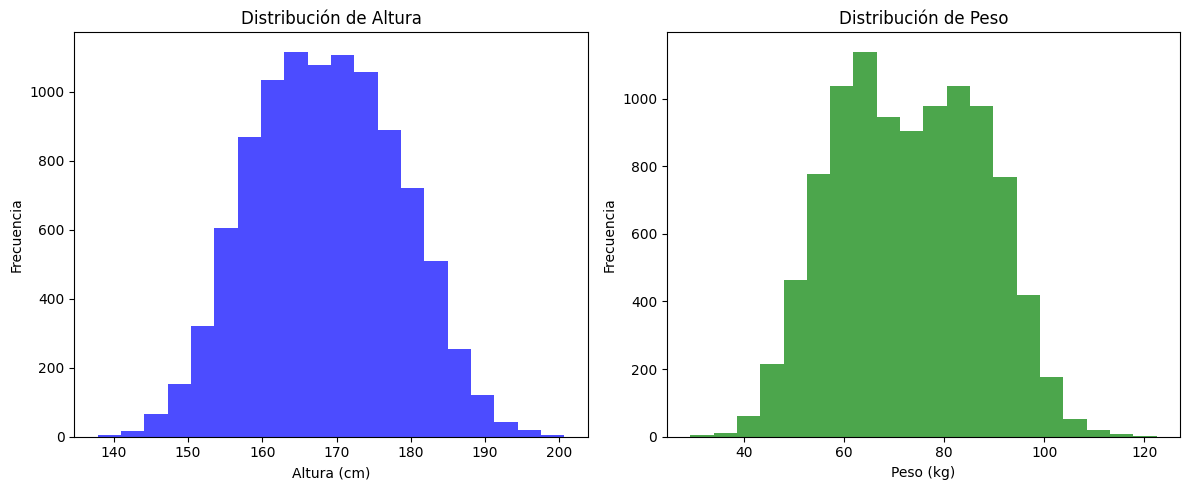

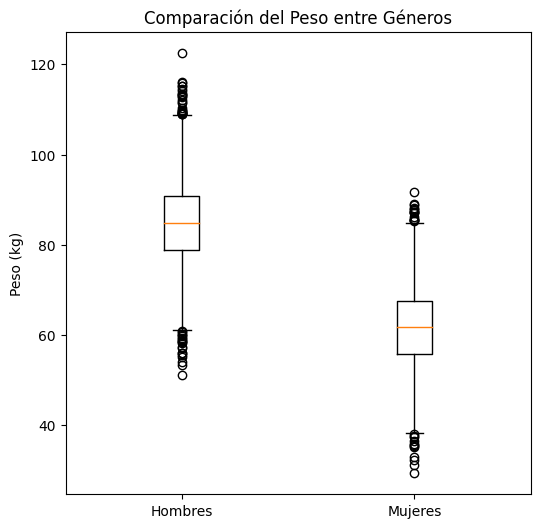

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data_clean['Height'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Altura')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(data_clean['Weight'], bins=20, color='green', alpha=0.7)
plt.title('Distribución de Peso')
plt.xlabel('Peso (kg)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Crear un diagrama de caja para comparar la distribución del peso entre géneros
plt.figure(figsize=(6, 6))
plt.boxplot([data_clean[data_clean['Gender'] == 'Male']['Weight'],
             data_clean[data_clean['Gender'] == 'Female']['Weight']],
            labels=['Hombres', 'Mujeres'])
plt.title('Comparación del Peso entre Géneros')
plt.ylabel('Peso (kg)')
plt.show()

### Parte 4: Operaciones Avanzadas

    Calcular los percentiles del peso para cada género.
    Crear una nueva columna que clasifique a los individuos como 'Bajo Peso', 'Peso Normal', 'Sobrepeso' o 'Obesidad' basado en su IMC (Índice de Masa Corporal).

In [31]:
# Calcular los percentiles del peso para cada género
percentiles_por_genero = data_clean.groupby('Gender')['Weight'].quantile([0.25, 0.5, 0.75]).unstack()

# Crear una nueva columna 'IMC' en el DataFrame
data_clean['IMC'] = (data_clean['Weight'] / (data_clean['Height'] ** 2))*10000

# Crear una nueva columna que clasifique a los individuos según su IMC
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Bajo Peso', 'Peso Normal', 'Sobrepeso', 'Obesidad']
data_clean['Clasificacion_IMC'] = pd.cut(data_clean['IMC'], bins=bins, labels=labels, include_lowest=True)



<ipython-input-31-d4dc8eb3b23d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['IMC'] = (data_clean['Weight'] / (data_clean['Height'] ** 2))*10000
<ipython-input-31-d4dc8eb3b23d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Clasificacion_IMC'] = pd.cut(data_clean['IMC'], bins=bins, labels=labels, include_lowest=True)


In [32]:
data_clean.head(5)

,Gender,Height,Weight,IMC,Clasificacion_IMC
0,Male,187.571423,109.720985,31.185761,Obesidad
1,Male,174.706036,73.622732,24.121044,Peso Normal
2,Male,188.239668,96.497550,27.232906,Sobrepeso
3,Male,182.196685,99.809504,30.067059,Obesidad
4,Male,177.499761,93.598619,29.708033,Sobrepeso


### Parte 5: Exportar Resultados

    Guardar los resultados del análisis en un nuevo archivo CSV.

In [33]:
data_clean.to_csv('nuevo_dataframe.csv', index=False)